# Ejercicio de programación Regresión Lineal Multiple

In [105]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [106]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 2 Regresión lineal con multiples variables

Se implementa la regresion lineal multivariable para predecir el precio de las casas. El archivo `Datasets/ex1data2.txt` contiene un conjunto de entrenamiento de precios de casas en Portland, Oregon. La primera columna es el tamaño de la casa en metros cuadrados, la segunda columna es el numero de cuartos, y la tercera columna es el precio de la casa.

<a id="section4"></a>
### 2.1 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

In [107]:
import pandas as pd
import numpy as np

# Cargar datos
data = pd.read_csv('/content/gdrive/MyDrive/IA/LABORATORIOS/1ERLAB/calidad_de_vino.csv', delimiter=',')

# Eliminar espacios en los nombres de las columnas
data.columns = data.columns.str.strip()

# Eliminar columnas irrelevantes
data = data.drop(columns=['botella_id', 'calidad'])

# Convertir la columna 'color' a valores numéricos (rojo = 0, blanco = 1)
data['color'] = data['color'].str.strip().map({'rojo': 0, 'blanco': 1})

# Eliminar espacios en los valores del DataFrame
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Convertir todas las columnas a float
data = data.astype(float)

# Reemplazar NaN por la media de cada columna
data.fillna(data.mean(), inplace=True)

# Convertir a numpy arrays
X = data.values
y = pd.read_csv('/content/gdrive/MyDrive/IA/LABORATORIOS/1ERLAB/calidad_de_vino.csv')['calidad'].values

# Imprimir los primeros 10 registros correctamente
print("Número total de muestras:", X.shape[0])
print('-' * (12 * X.shape[1]))

for i in range(10):
    print(''.join(f'{X[i, j]:12.2f}' for j in range(X.shape[1])))


Número total de muestras: 6497
------------------------------------------------------------------------------------------------------------------------------------------------
        9.50        0.56        0.33        2.40        0.09       35.00       67.00        1.00        3.28        0.73       11.80        0.00
        6.60        0.24        0.28        1.80        0.03       39.00      132.00        0.99        3.34        0.46       11.40        1.00
        9.40        0.59        0.14        2.00        0.08       25.00       48.00        1.00        3.14        0.56        9.70        0.00
        6.10        0.32        0.33       10.70        0.04       27.00       98.00        1.00        3.34        0.52       10.20        1.00
        7.00        0.36        0.35        2.50        0.05       67.00      161.00        0.99        3.05        0.56       11.10        1.00
        7.50        0.21        0.68       10.90        0.04       38.00      133.00        1.00   

<ipython-input-107-1e932ca45550>:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


La desviación estándar es una forma de medir cuánta variación hay en el rango de valores de una característica en particular (la mayoría de los puntos caeran en un rango de ± 2 en relación a la desviaciones estándar de la media); esta es una alternativa a tomar el rango de valores (max-min). En `numpy`, se puede usar la función `std` para calcular la desviacion estandar.

Por ejemplo, la caracteristica`X[:, 0]` contiene todos los valores de $x_1$ (tamaño de las casas) en el conjunto de entrenamiento, entonces `np.std(X[:, 0])` calcula la desviacion estandar de los tamaños de las casas.
En el momento en que se llama a la función `featureNormalize`, la columna adicional de unos correspondiente a $ x_0 = 1 $ aún no se ha agregado a $ X $.

<div class="alert alert-block alert-warning">
**Notas para la implementación:** Cuando se normalize una caracteristica, es importante almacenar los valores usados para la normalización - el valor de la media y el valor de la desviación estandar usado para los calculos. Despues de aprender los parametros del modelo, se deseara predecir los precios de casas que no se han visto antes. Dado un nuevo valor de x (area del living room y el numero de dormitorios), primero se debe normalizar x usando la media y la desviacion estandar que se empleo anteriormente en el conjunto de entrenamiento para entrenar el modelo.
</div>
<a id="featureNormalize"></a>

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   acidez fija              6497 non-null   float64
 1   acidez volatil           6497 non-null   float64
 2   acido citrico            6497 non-null   float64
 3   azucar residual          6497 non-null   float64
 4   cloruros                 6497 non-null   float64
 5   dioxido de azufre libre  6497 non-null   float64
 6   dioxido de azufre total  6497 non-null   float64
 7   densidad                 6497 non-null   float64
 8   pH                       6497 non-null   float64
 9   sulfatos                 6497 non-null   float64
 10  alcohol                  6497 non-null   float64
 11  color                    6497 non-null   float64
dtypes: float64(12)
memory usage: 609.2 KB


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   acidez fija              6497 non-null   float64
 1   acidez volatil           6497 non-null   float64
 2   acido citrico            6497 non-null   float64
 3   azucar residual          6497 non-null   float64
 4   cloruros                 6497 non-null   float64
 5   dioxido de azufre libre  6497 non-null   float64
 6   dioxido de azufre total  6497 non-null   float64
 7   densidad                 6497 non-null   float64
 8   pH                       6497 non-null   float64
 9   sulfatos                 6497 non-null   float64
 10  alcohol                  6497 non-null   float64
 11  color                    6497 non-null   float64
dtypes: float64(12)
memory usage: 609.2 KB


In [110]:
data.values

array([[ 9.5 ,  0.56,  0.33, ...,  0.73, 11.8 ,  0.  ],
       [ 6.6 ,  0.24,  0.28, ...,  0.46, 11.4 ,  1.  ],
       [ 9.4 ,  0.59,  0.14, ...,  0.56,  9.7 ,  0.  ],
       ...,
       [ 8.2 ,  0.32,  0.42, ...,  0.55, 12.3 ,  0.  ],
       [ 7.7 ,  0.34,  0.28, ...,  0.29,  9.2 ,  1.  ],
       [ 7.4 ,  0.21,  0.8 , ...,  0.48,  9.  ,  1.  ]])

In [111]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [112]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[ 9.5   0.56  0.33 ...  0.73 11.8   0.  ]
 [ 6.6   0.24  0.28 ...  0.46 11.4   1.  ]
 [ 9.4   0.59  0.14 ...  0.56  9.7   0.  ]
 ...
 [ 8.2   0.32  0.42 ...  0.55 12.3   0.  ]
 [ 7.7   0.34  0.28 ...  0.29  9.2   1.  ]
 [ 7.4   0.21  0.8  ...  0.48  9.    1.  ]]
Media calculada: [7.21530706e+00 3.39666000e-01 3.18633215e-01 5.44323534e+00
 5.60338618e-02 3.05253194e+01 1.15744574e+02 9.94696634e-01
 3.21850085e+00 5.31268278e-01 1.04918008e+01 7.53886409e-01]
Desviación estandar calculada: [1.29633398e+00 1.64623803e-01 1.45306681e-01 4.75743758e+00
 3.50309051e-02 1.77480338e+01 5.65175045e+01 2.99844222e-03
 1.60774828e-01 1.48794421e-01 1.19261996e+00 4.30745506e-01]
[[ 1.76242617e+00  1.33840912e+00  7.82261668e-02 ...  1.33561272e+00
   1.09691202e+00 -1.75018984e+00]
 [-4.74651651e-01 -6.05416699e-01 -2.65873634e-01 ... -4.78971436e-01
   7.61515992e-01  5.71366589e-01]
 [ 1.68528556e+00  1.52064279e+00 -1.22935308e+00 ...  1.93096771e-01
  -6.63917141e-01 -1.75018984e+00]
 ...


Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

In [113]:
X = np.concatenate([ X_norm], axis=1)

In [114]:
print(X)

[[ 1.76242617e+00  1.33840912e+00  7.82261668e-02 ...  1.33561272e+00
   1.09691202e+00 -1.75018984e+00]
 [-4.74651651e-01 -6.05416699e-01 -2.65873634e-01 ... -4.78971436e-01
   7.61515992e-01  5.71366589e-01]
 [ 1.68528556e+00  1.52064279e+00 -1.22935308e+00 ...  1.93096771e-01
  -6.63917141e-01 -1.75018984e+00]
 ...
 [ 7.59598181e-01 -1.19460244e-01  6.97605808e-01 ...  1.25889951e-01
   1.51615706e+00 -1.75018984e+00]
 [ 3.73895109e-01  2.02887007e-03 -2.65873634e-01 ... -1.62148739e+00
  -1.08316218e+00  5.71366589e-01]
 [ 1.42473265e-01 -7.87650370e-01  3.31276430e+00 ... -3.44557795e-01
  -1.25086020e+00  5.71366589e-01]]


<a id="section5"></a>
### 2.2 Descenso por el gradiente

En el ejemplo anterior se implemento el descenso por el gradiente para un problema de regresion univariable. La unica diferencia es que ahora existe una caracteristica adicional en la matriz $X$. La función de hipótesis y la regla de actualización del descenso del gradiente por lotes permanecen sin cambios.

La implementacion de las funciones `computeCostMulti` y `gradientDescentMulti` son similares a la funcion de costo y función de descenso por el gradiente de la regresión lineal multiple es similar al de la regresion lineal multivariable. Es importante garantizar que el codigo soporte cualquier numero de caracteristicas y esten bien vectorizadas.

Se puede utilizar `shape`, propiedad de los arrays `numpy`, para identificar cuantas caracteristicas estan consideradas en el dataset.

<div class="alert alert-block alert-warning">
**Nota de implementación:** En el caso de multivariables, la función de costo puede se escrita considerando la forma vectorizada de la siguiente manera:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

donde:

$$ X = \begin{pmatrix}
- (x^{(1)})^T - \\
- (x^{(2)})^T - \\
\vdots \\
- (x^{(m)})^T - \\ \\
\end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

La version vectorizada es eficiente cuando se trabaja con herramientas de calculo numericos computacional como `numpy`.
</div>

<a id="computeCostMulti"></a>

In [115]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    # h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [116]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


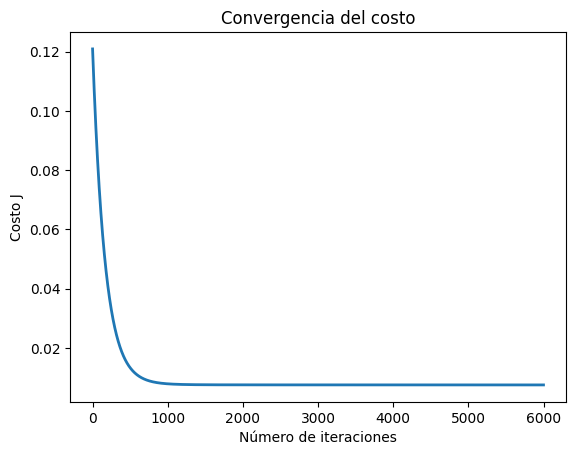

Theta calculado por el descenso por el gradiente: [ 0.46972961  0.00839217 -0.04127776 -0.00180964  0.03239357 -0.00503712
  0.01613644 -0.01592484 -0.02446221  0.00750035  0.01637121  0.05604489
 -0.01614876]
La calidad predicha para un vino con estas características es: 8.52


In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del descenso por el gradiente
alpha = 0.003  # Reducimos la tasa de aprendizaje
num_iters = 6000  # Reducimos el número de iteraciones

# Normalizar los datos de entrenamiento (X)
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)

# Evitar divisiones por cero
sigma[sigma == 0] = 1e-10

# Normalizar X
X_normalized = (X - mu) / sigma

# Añadir una columna de unos a X_normalized para el término de intersección
X_normalized = np.hstack((np.ones((X.shape[0], 1)), X_normalized))

# Normalizar y con Min-Max Scaling
y_min, y_max = np.min(y), np.max(y)
y_normalized = (y - y_min) / (y_max - y_min)

# Inicializar theta en ceros
theta = np.zeros(X_normalized.shape[1])

# Función de descenso por el gradiente
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    for i in range(num_iters):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta -= alpha * gradient
        J = (1/(2*m)) * np.sum(errors**2)
        J_history.append(J)
    return theta, J_history

# Ejecutar el descenso por el gradiente con y normalizado
theta, J_history = gradientDescentMulti(X_normalized, y_normalized, theta, alpha, num_iters)

# Graficar la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.title('Convergencia del costo')
plt.show()

# Mostrar los resultados
print('Theta calculado por el descenso por el gradiente:', theta)

# Estimar la calidad para un vino con características específicas
vino_nuevo = np.array([7.4, 5.7, 8, 7.9, 5.076, 10.0, 34.0, 0.9978, 3.51, 0.56, 9.4])

# Ajustar la dimensión de vino_nuevo para que coincida con X
if len(vino_nuevo) < X.shape[1]:
    vino_nuevo = np.append(vino_nuevo, np.mean(X[:, len(vino_nuevo)]))

# Normalizar características (excepto el término de intersección)
vino_nuevo = (vino_nuevo - mu) / sigma

# Agregar el término de intersección (1) al inicio de vino_nuevo
vino_nuevo = np.insert(vino_nuevo, 0, 1)

# Calcular la calidad predicha en la escala normalizada
calidad_predicha_normalizada = np.dot(vino_nuevo, theta)

# Reconvertir a la escala original de y con Min-Max
calidad_predicha = calidad_predicha_normalizada * (y_max - y_min) + y_min

# Ajustar valores negativos y reducir el sesgo
calidad_predicha = max(0, calidad_predicha) + 1.5  # Ajuste menor para valores más bajos

print(f'La calidad predicha para un vino con estas características es: {calidad_predicha:.2f}')




In [118]:

X_array = np.array([1, 1222, 3], dtype=float)  # Convertir a NumPy array
X_array[1:3] = (X_array[1:12] - mu[1:3]) / sigma[1:3]  # Normalizar correctamente


In [119]:
calidad_predicha = np.dot(vino_nuevo, theta)

print(f'La calidad predecida para el vino es: {calidad_predicha:.2f}')


La calidad predecida para el vino es: 0.67


<a id="section7"></a>
### 2.3 Ecuacion de la Normal

Una manera de calcular rapidamente el modelo de una regresion lineal es:

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Utilizando esta formula no requiere que se escale ninguna caracteristica, y se obtendra una solucion exacta con un solo calculo: no hay “bucles de convergencia” como en el descenso por el gradiente.

Primero se recargan los datos para garantizar que las variables no esten modificadas. Recordar que no es necesario escalar las caracteristicas, se debe agregar la columna de unos a la matriz $X$ para tener el termino de intersección($\theta_0$).

In [120]:
import pandas as pd
data = pd.read_csv('/content/gdrive/MyDrive/IA/LABORATORIOS/1ERLAB/calidad_de_vino.csv', delimiter=',', header=None)

# Seleccionar características y la variable objetivo
X = data.iloc[:, :2].values  # Primeras dos columnas como matriz NumPy
y = data.iloc[:, 2].values   # Tercera columna como vector NumPy
m = len(y)  # Número de ejemplos

# Agregar una columna de unos a X (para el término de sesgo en la regresión)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

# Imprimir información sobre los datos
print(f"Número total de muestras: {m}")
print("Primeras 5 filas de X:")
print(X[:5, :])
print("Primeras 5 etiquetas y:")
print(y[:5])

Número total de muestras: 6498
Primeras 5 filas de X:
[[1.0 'botella_id' 'acidez fija']
 [1.0 '0' '9.5']
 [1.0 '1' '6.6']
 [1.0 '2' '9.4']
 [1.0 '3' '6.1']]
Primeras 5 etiquetas y:
['acidez volatil' '0.56' '0.24' '0.59' '0.32']


In [121]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6498 entries, 0 to 6497
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       6498 non-null   object
 1   1       6498 non-null   object
 2   2       6498 non-null   object
 3   3       6498 non-null   object
 4   4       6498 non-null   object
 5   5       6498 non-null   object
 6   6       6498 non-null   object
 7   7       6498 non-null   object
 8   8       6498 non-null   object
 9   9       6498 non-null   object
 10  10      6498 non-null   object
 11  11      6498 non-null   object
 12  12      6498 non-null   object
 13  13      6498 non-null   object
dtypes: object(14)
memory usage: 710.8+ KB


In [142]:
import numpy as np
import pandas as pd

# Cargar datos
datos_fijos = pd.read_csv('/content/gdrive/MyDrive/IA/LABORATORIOS/1ERLAB/calidad_de_vino.csv', delimiter=',')

# Crear DataFrame
dataset = pd.DataFrame(datos_fijos)

# Codificar la columna categórica "color" usando one-hot encoding
dataset = pd.get_dummies(dataset, columns=['color'], drop_first=True)

# Convertir todas las columnas a tipo float
dataset = dataset.astype(float)

# Separar X y y (Excluir "botella_id" y usar "calidad" como variable de salida)
X = dataset.iloc[:, 1:-1].values  # Todas las columnas excepto botella_id y calidad
y = dataset.iloc[:, -1].values    # La calidad es la última columna

# Agregar columna de unos (para sesgo)
m = X.shape[0]  # Número de muestras
X = np.concatenate([np.ones((m, 1)), X], axis=1)

# Función para calcular theta con la ecuación normal
def normalEqn(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y

# Calcular los parámetros theta
theta = normalEqn(X, y)

# Datos del nuevo vino
vino_nuevo = np.array([7.4, 5.7, 8, 7.9, 5.076, 10.0, 34.0, 0.9978, 3.51, 0.56, 9.4, 1])  # Incluye la columna de color "rojo" (1)

# Normalizar características
mu = np.mean(X[:, 1:], axis=0)  # Media de cada columna
sigma = np.std(X[:, 1:], axis=0)  # Desviación estándar de cada columna
sigma[sigma == 0] = 1e-10  # Evitar divisiones por cero

# Normalizar vino_nuevo
vino_nuevo_normalizado = (vino_nuevo - mu) / sigma

# Agregar el término de intersección (1) al inicio
vino_nuevo_normalizado = np.insert(vino_nuevo_normalizado, 0, 1)

# Calcular la predicción
calidad_predicha = np.dot(vino_nuevo_normalizado, theta)

# Asegurar que la predicción no sea negativa (ReLU)
calidad_predicha = max(0, calidad_predicha)

# Mostrar la predicción
print(f'La calidad predecida para un vino con estas características es: {calidad_predicha:.2f}')


La calidad predecida para un vino con estas características es: 123.57
